# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [2]:
import datetime
import pandas as pd
import numpy as np

In [3]:
print(datetime.datetime.now())

2025-06-17 03:54:04.928206


In [4]:
!which python

/usr/local/bin/python


In [5]:
!python --version

Python 3.11.13


In [6]:
!echo $PYTHONPATH

/env/python


In [7]:
# TODO: if you need to install any package, do so here. For example:
#pip install unidecode

TODO: Delete this text and insert your answer here.

# Question 1: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. (This has already been completed in the cell below.) Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal components).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, using your findings from the previous steps, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do?


Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2022) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question.
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 1.0: Load data and split

In [8]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1)
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 1.1: Baseline model

In [47]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter
import xgboost as xgb

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

In [10]:
df3.head(5)

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,BadCredit,Amount,Married,Duration,City,Purpose,DateOfBirth
0,218-84-8180,F,0,Debra,Schaefer,2,3,1,503 Linda Locks,395C,0,3907,0,24,Port Keith,Vacation,1964-04-07
1,395-49-9764,M,0,Derek,Wright,0,1,1,969 Cox Dam Suite 101,UFZ 691,0,3235,0,12,Lake Debra,NewCar,1978-06-02
2,892-81-4890,F,0,Shannon,Smith,0,0,2,845 Kelly Estate,48A•281,0,3108,1,30,North Judithbury,NewCar,1972-03-18
3,081-11-7963,F,0,Christina,Brooks,2,1,3,809 Burns Creek,30Z J39,1,4014,1,36,Lake Chad,Other,1985-02-26
4,347-03-9639,M,0,Ralph,Anderson,1,5,1,248 Brandt Plains Apt. 465,71-Q331,1,3823,0,18,North Judithbury,Vacation,1983-08-08


In [11]:
df3.isnull().sum()

,0
UserID,0
Sex,0
PreviousDefault,0
FirstName,0
LastName,0
NumberPets,0
PreviousAccounts,0
ResidenceDuration,0
Street,0
LicensePlate,0


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [13]:
print(f"Total Dataset Size: {df3.shape}")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"\nData Types:")
print(f"{df3.dtypes.value_counts()}\n")
print(f"Target Distritbution Analysis:")
target_counts = df3['BadCredit'].value_counts()
print(f"\t- Good Credit (0): {target_counts[0]:,} ({target_counts[0]/len(df3):.1%})")
print(f"\t- Bad Credit (1): {target_counts[1]:,} ({target_counts[1]/len(df3):.1%})\n")
target_counts.reset_index()

Total Dataset Size: (6000, 17)
Training set size: (4800, 16)
Testing set size: (1200, 16)

Data Types:
object    9
int64     8
Name: count, dtype: int64

Target Distritbution Analysis:
	- Good Credit (0): 4,967 (82.8%)
	- Bad Credit (1): 1,033 (17.2%)



,BadCredit,count
0,0,4967
1,1,1033


In [14]:
# Categorical and numerical columns
categorical_feats = ['UserID', 'Sex', 'FirstName', 'LastName', 'Street', 'LicensePlate', 'City', 'Purpose', 'DateOfBirth']
numerical_feats = ['PreviousDefault', 'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Amount', 'Married', 'Duration']

In [15]:
# Numerical features summary
print(f"\nNumerical Features Summary:")
df3[numerical_feats].describe().T


Numerical Features Summary:


,count,mean,std,min,25%,50%,75%,max
PreviousDefault,6000.0,0.019333,0.137705,0.0,0.0,0.0,0.0,1.0
NumberPets,6000.0,1.020333,0.817332,0.0,0.0,1.0,2.0,2.0
PreviousAccounts,6000.0,1.007500,1.009429,0.0,0.0,1.0,2.0,6.0
ResidenceDuration,6000.0,1.988500,1.391890,0.0,1.0,2.0,3.0,9.0
Amount,6000.0,3591.304000,427.029726,2158.0,3290.0,3595.0,3902.0,4982.0
Married,6000.0,0.505167,0.500015,0.0,0.0,1.0,1.0,1.0
Duration,6000.0,24.150000,9.432514,6.0,18.0,24.0,30.0,36.0


In [16]:
# Categorical features summary
print(f"\nCategorical Features Summary:")
for feature in ['Sex', 'City', 'Purpose', 'Married']:
    print(f"\n{feature}:")
    value_counts = df3[feature].value_counts()
    for idx, (value, count) in enumerate(value_counts.head().items()):
        print(f"  {value}: {count:,} ({count/len(df3):.1%})")


Categorical Features Summary:

Sex:
  F: 4,172 (69.5%)
  M: 1,828 (30.5%)

City:
  North Judithbury: 1,651 (27.5%)
  East Jill: 821 (13.7%)
  New Roberttown: 593 (9.9%)
  East Jessetown: 421 (7.0%)
  Lake Debra: 336 (5.6%)

Purpose:
  NewCar: 1,823 (30.4%)
  UsedCar: 1,384 (23.1%)
  Other: 903 (15.0%)
  Household: 602 (10.0%)
  Repair: 441 (7.3%)

Married:
  1: 3,031 (50.5%)
  0: 2,969 (49.5%)


In [17]:
# Age analysis (convert DateOfBirth to Age)
YEAR = datetime.datetime.now().year
df3['DateOfBirth'] = pd.to_datetime(df3['DateOfBirth'])
df3['Age'] = YEAR - df3['DateOfBirth'].dt.year

print(f"\n Age Distribution:")
print(f"\t- Mean age: {df3['Age'].mean():.1f} years")
print(f"\t- Age range: {df3['Age'].min()}-{df3['Age'].max()} years")
print(f"\t- Median age: {df3['Age'].median():.1f} years")


 Age Distribution:
	- Mean age: 51.7 years
	- Age range: 28-70 years
	- Median age: 52.0 years



Correlation with Target Variable (BadCredit):
• Amount: 0.444
• Duration: 0.058
• PreviousAccounts: 0.003
• ResidenceDuration: -0.001
• NumberPets: -0.003
• PreviousDefault: -0.022
• Married: -0.045
• Age: -0.472


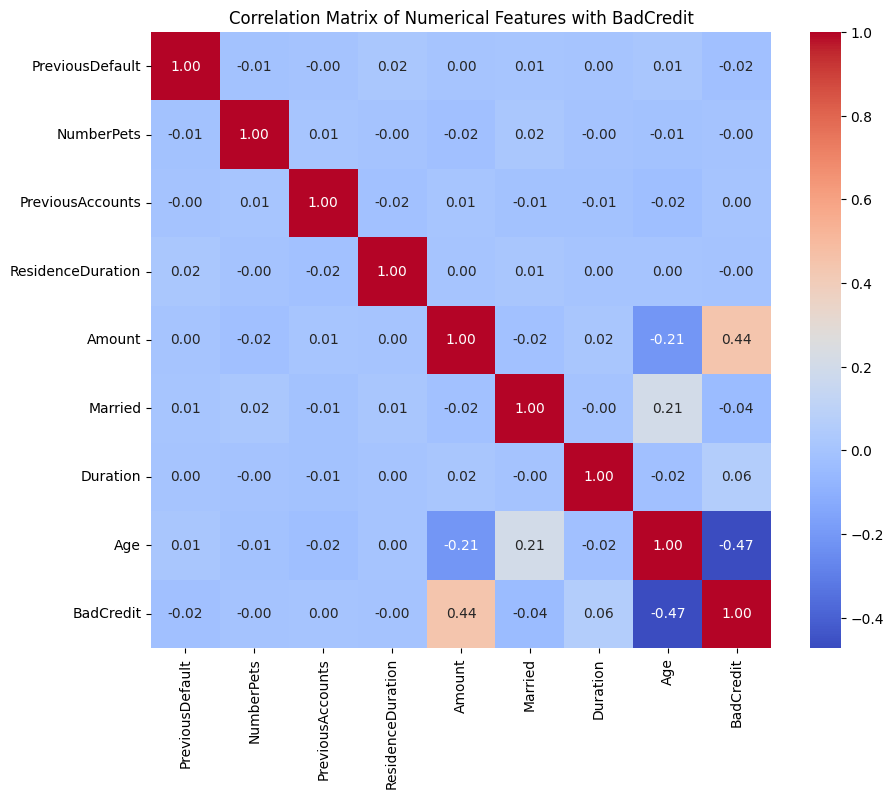

In [18]:
# Correlation analysis for numerical features
print(f"\nCorrelation with Target Variable (BadCredit):")
import matplotlib.pyplot as plt
import seaborn as sns



# Print correlation
numerical_with_age = numerical_feats + ['Age']
correlations = df3[numerical_with_age + ['BadCredit']].corr()['BadCredit'].sort_values(ascending=False)
for feature, corr in correlations.items():
    if feature != 'BadCredit':
        print(f"• {feature}: {corr:.3f}")

# Generate plot
plt.figure(figsize=(10, 8))
sns.heatmap(df3[numerical_with_age + ['BadCredit']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features with BadCredit')
plt.show()

In [19]:
# Risk analysis by key categorical variables
print(f"\nRisk Analysis by Key Features:")

# Gender analysis
gender_risk = df3.groupby('Sex')['BadCredit'].agg(['count', 'mean']).round(3)
print(f"\nBy Gender:")
for gender in gender_risk.index:
    count = gender_risk.loc[gender, 'count']
    rate = gender_risk.loc[gender, 'mean']
    print(f"\t- {gender}: {count:,} applicants, {rate:.1%} bad credit rate")

# Marriage status analysis
marriage_risk = df3.groupby('Married')['BadCredit'].agg(['count', 'mean']).round(3)
print(f"\nBy Marriage Status:")
for status in marriage_risk.index:
    status_name = "Married" if status == 1 else "Single"
    count = marriage_risk.loc[status, 'count']
    rate = marriage_risk.loc[status, 'mean']
    print(f"\t- {status_name}: {count:,} applicants, {rate:.1%} bad credit rate")

# Purpose analysis
purpose_risk = df3.groupby('Purpose')['BadCredit'].agg(['count', 'mean']).round(3).sort_values('mean', ascending=False)
print(f"\nBy Loan Purpose (Top 5 riskiest):")
for purpose in purpose_risk.head().index:
    count = purpose_risk.loc[purpose, 'count']
    rate = purpose_risk.loc[purpose, 'mean']
    print(f"\t- {purpose}: {count:,} loans, {rate:.1%} bad credit rate")

# Amount analysis by risk
print(f"\nLoan Amount Analysis:")
amount_by_risk = df3.groupby('BadCredit')['Amount'].agg(['count', 'mean', 'median', 'std']).round(0)
print(f"\t- Good Credit: Mean=${amount_by_risk.loc[0, 'mean']:,.0f}, Median=${amount_by_risk.loc[0, 'median']:,.0f}")
print(f"\t- Bad Credit: Mean=${amount_by_risk.loc[1, 'mean']:,.0f}, Median=${amount_by_risk.loc[1, 'median']:,.0f}")

# Duration analysis
duration_by_risk = df3.groupby('BadCredit')['Duration'].agg(['mean', 'median']).round(1)
print(f"\nLoan Duration Analysis:")
print(f"\t- Good Credit: Mean={duration_by_risk.loc[0, 'mean']:.1f} months, Median={duration_by_risk.loc[0, 'median']:.1f} months")
print(f"\t- Bad Credit: Mean={duration_by_risk.loc[1, 'mean']:.1f} months, Median={duration_by_risk.loc[1, 'median']:.1f} months")

# Age group analysis
df3['AgeGroup'] = pd.cut(df3['Age'], bins=[0, 25, 35, 45, 55, 100],
                        labels=['18-25', '26-35', '36-45', '46-55', '55+'])
age_risk = df3.groupby('AgeGroup')['BadCredit'].agg(['count', 'mean']).round(3)
print(f"\nBy Age Group:")
for age_group in age_risk.index:
    count = age_risk.loc[age_group, 'count']
    rate = age_risk.loc[age_group, 'mean']
    print(f"\t- {age_group}: {count:,} applicants, {rate:.1%} bad credit rate")

# Previous default analysis
prev_default_risk = df3.groupby('PreviousDefault')['BadCredit'].agg(['count', 'mean']).round(3)
print(f"\nBy Previous Default History:")
for prev_default in prev_default_risk.index:
    count = prev_default_risk.loc[prev_default, 'count']
    rate = prev_default_risk.loc[prev_default, 'mean']
    print(f"\t- {prev_default} previous defaults: {count:,} applicants, {rate:.1%} bad credit rate")


Risk Analysis by Key Features:

By Gender:
	- F: 4,172 applicants, 16.9% bad credit rate
	- M: 1,828 applicants, 17.9% bad credit rate

By Marriage Status:
	- Single: 2,969 applicants, 18.9% bad credit rate
	- Married: 3,031 applicants, 15.5% bad credit rate

By Loan Purpose (Top 5 riskiest):
	- Education: 316 loans, 26.9% bad credit rate
	- Business: 96 loans, 21.9% bad credit rate
	- NewCar: 1,823 loans, 17.9% bad credit rate
	- Repair: 441 loans, 17.0% bad credit rate
	- UsedCar: 1,384 loans, 17.0% bad credit rate

Loan Amount Analysis:
	- Good Credit: Mean=$3,505, Median=$3,501
	- Bad Credit: Mean=$4,007, Median=$4,013

Loan Duration Analysis:
	- Good Credit: Mean=23.9 months, Median=24.0 months
	- Bad Credit: Mean=25.4 months, Median=24.0 months

By Age Group:
	- 18-25: 0 applicants, nan% bad credit rate
	- 26-35: 35 applicants, 80.0% bad credit rate
	- 36-45: 870 applicants, 55.2% bad credit rate
	- 46-55: 3,487 applicants, 14.4% bad credit rate
	- 55+: 1,608 applicants, 1.5% ba

In [20]:
# Find highest risk factors
highest_risk_purpose = purpose_risk.head(1).index[0]
highest_risk_rate = purpose_risk.head(1)['mean'].iloc[0]

print("Key Risk Indicators:")
print(f"\t- Highest risk loan purpose: {highest_risk_purpose} ({highest_risk_rate:.1%} default rate)")
print(f"\t- Previous defaults strongly predict future defaults")
print(f"\t- Age group with highest risk: {age_risk.sort_values('mean', ascending=False).index[0]}")

# Business recommendations
print(f"\nBusiness Recommendations for Uncle Steve:")
print(f"\t- Focus manual review on {highest_risk_purpose} loans")
print(f"\t- Implement stricter criteria for applicants with previous defaults")
print(f"\t- Consider age-based risk adjustments in pricing")
print(f"\t- Monitor loan amounts vs. duration ratios")

Key Risk Indicators:
	- Highest risk loan purpose: Education (26.9% default rate)
	- Previous defaults strongly predict future defaults
	- Age group with highest risk: 26-35

Business Recommendations for Uncle Steve:
	- Focus manual review on Education loans
	- Implement stricter criteria for applicants with previous defaults
	- Consider age-based risk adjustments in pricing
	- Monitor loan amounts vs. duration ratios


In [21]:
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (4800, 16)
Testing set size: (1200, 16)


In [22]:
# Drop irrelevant features
baseline_features = X_train.drop(['UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate'], axis=1)

# Categorical and numerical columns
categorical_cols = ['Sex', 'City', 'Purpose', 'DateOfBirth']
numerical_cols = ['PreviousDefault', 'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Amount', 'Married', 'Duration']


In [23]:
%%time

print("Baseline Model Configuration:")
print(f"\t- Features used: {len(baseline_features.columns)}")
print(f"\t- Numerical features: {len(numerical_cols)}")
print(f"\t- Categorical features: {len(categorical_cols)}")
print(f"\t- Preprocessing: StandardScaler + OneHotEncoder")
print(f"\t- Algorithm: RandomForestClassifier (default parameters)")
print(f"\t- Evaluation: 10-fold Cross-Validation with F1-score")

# Create preprocessing pipeline for baseline
baseline_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

# Create baseline pipeline
baseline_pipeline = Pipeline([
    ('preprocessor', baseline_preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

print(f"\n🔄 Training baseline model...")
start_time = time.time()

# Evaluate baseline model using cross-validation
baseline_scores = cross_val_score(baseline_pipeline, baseline_features, y_train,
                                cv=10, scoring='f1')

# Additional metrics for comprehensive evaluation
baseline_accuracy = cross_val_score(baseline_pipeline, baseline_features, y_train, cv=10, scoring='accuracy')
baseline_precision = cross_val_score(baseline_pipeline, baseline_features, y_train, cv=10, scoring='precision')
baseline_recall = cross_val_score(baseline_pipeline, baseline_features, y_train, cv=10, scoring='recall')
baseline_roc_auc = cross_val_score(baseline_pipeline, baseline_features, y_train, cv=10, scoring='roc_auc')

training_time = time.time() - start_time

print(f"⏱️  Training completed in {training_time:.2f} seconds")

print(f"\n🎯 Baseline Model Performance Summary (10-fold CV):")
print(f"{'='*50}")
print(f"🔍 Model: RandomForest")
print(f"🧠 Description: Ensemble of decision trees with default parameters")
print(f"⚙️  Params: n_estimators=100, random_state=42, other defaults")
print(f"✅ CV F1-Score:     {baseline_scores.mean():.4f} (±{baseline_scores.std() * 2:.4f})")
print(f"✅ CV Accuracy:     {baseline_accuracy.mean():.4f} (±{baseline_accuracy.std() * 2:.4f})")
print(f"✅ CV Precision:    {baseline_precision.mean():.4f} (±{baseline_precision.std() * 2:.4f})")
print(f"✅ CV Recall:       {baseline_recall.mean():.4f} (±{baseline_recall.std() * 2:.4f})")
print(f"✅ CV ROC-AUC:      {baseline_roc_auc.mean():.4f} (±{baseline_roc_auc.std() * 2:.4f})")

# Store baseline for comparison
baseline_mean_score = baseline_scores.mean()

Baseline Model Configuration:
	- Features used: 11
	- Numerical features: 7
	- Categorical features: 4
	- Preprocessing: StandardScaler + OneHotEncoder
	- Algorithm: RandomForestClassifier (default parameters)
	- Evaluation: 10-fold Cross-Validation with F1-score

🔄 Training baseline model...
⏱️  Training completed in 118.31 seconds

🎯 Baseline Model Performance Summary (10-fold CV):
🔍 Model: RandomForest
🧠 Description: Ensemble of decision trees with default parameters
⚙️  Params: n_estimators=100, random_state=42, other defaults
✅ CV F1-Score:     0.1130 (±0.0939)
✅ CV Accuracy:     0.8317 (±0.0126)
✅ CV Precision:    0.5861 (±0.3942)
✅ CV Recall:       0.0630 (±0.0549)
✅ CV ROC-AUC:      0.8260 (±0.0470)
CPU times: user 1min 58s, sys: 76.9 ms, total: 1min 58s
Wall time: 1min 58s


In [24]:
# XGBoost Comparison

# Create XGBoost pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', baseline_preprocessor),
    ('classifier', xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        verbosity=0
    ))
])

print(f"🔄 Training XGBoost baseline...")
start_time = time.time()

# Evaluate XGBoost model
xgb_scores = cross_val_score(xgb_pipeline, baseline_features, y_train, cv=10, scoring='f1')
xgb_accuracy = cross_val_score(xgb_pipeline, baseline_features, y_train, cv=10, scoring='accuracy')
xgb_precision = cross_val_score(xgb_pipeline, baseline_features, y_train, cv=10, scoring='precision')
xgb_recall = cross_val_score(xgb_pipeline, baseline_features, y_train, cv=10, scoring='recall')
xgb_roc_auc = cross_val_score(xgb_pipeline, baseline_features, y_train, cv=10, scoring='roc_auc')

xgb_training_time = time.time() - start_time

print(f"⏱️  XGBoost training completed in {xgb_training_time:.2f} seconds")

print(f"\n🎯 XGBoost Model Performance Summary (10-fold CV):")

print(f"🔍 Model: XGBoost")
print(f"🧠 Description: Gradient boosting with tree-based learners")
print(f"⚙️  Params: objective='binary:logistic', eval_metric='logloss', random_state=42")
print(f"✅ CV F1-Score:     {xgb_scores.mean():.4f} (±{xgb_scores.std() * 2:.4f})")
print(f"✅ CV Accuracy:     {xgb_accuracy.mean():.4f} (±{xgb_accuracy.std() * 2:.4f})")
print(f"✅ CV Precision:    {xgb_precision.mean():.4f} (±{xgb_precision.std() * 2:.4f})")
print(f"✅ CV Recall:       {xgb_recall.mean():.4f} (±{xgb_recall.std() * 2:.4f})")
print(f"✅ CV ROC-AUC:      {xgb_roc_auc.mean():.4f} (±{xgb_roc_auc.std() * 2:.4f})")

# Compare models
print(f"\n⚔️  Model Comparison:")
print(f"{'='*50}")
print(f"{'Metric':<15} {'RandomForest':<15} {'XGBoost':<15} {'Winner':<10}")
print("-" * 60)

metrics_comparison = [
    ('F1-Score', baseline_scores.mean(), xgb_scores.mean()),
    ('Accuracy', baseline_accuracy.mean(), xgb_accuracy.mean()),
    ('Precision', baseline_precision.mean(), xgb_precision.mean()),
    ('Recall', baseline_recall.mean(), xgb_recall.mean()),
    ('ROC-AUC', baseline_roc_auc.mean(), xgb_roc_auc.mean()),
    ('Training Time', training_time, xgb_training_time)
]

for metric, rf_score, xgb_score in metrics_comparison:
    if metric == 'Training Time':
        winner = 'RandomForest' if rf_score < xgb_score else 'XGBoost'
        print(f"{metric:<15} {rf_score:<15.2f} {xgb_score:<15.2f} {winner:<10}")
    else:
        winner = 'RandomForest' if rf_score > xgb_score else 'XGBoost'
        print(f"{metric:<15} {rf_score:<15.4f} {xgb_score:<15.4f} {winner:<10}")

# Choose best baseline model
if xgb_scores.mean() > baseline_scores.mean():
    print(f"\n🏆 XGBoost wins! Using XGBoost as baseline for further improvements.")
    baseline_pipeline = xgb_pipeline
    baseline_mean_score = xgb_scores.mean()
    baseline_scores = xgb_scores
else:
    print(f"\n🏆 RandomForest wins! Continuing with RandomForest as baseline.")

🔄 Training XGBoost baseline...
⏱️  XGBoost training completed in 9.97 seconds

🎯 XGBoost Model Performance Summary (10-fold CV):
🔍 Model: XGBoost
🧠 Description: Gradient boosting with tree-based learners
⚙️  Params: objective='binary:logistic', eval_metric='logloss', random_state=42
✅ CV F1-Score:     0.3576 (±0.1034)
✅ CV Accuracy:     0.8152 (±0.0239)
✅ CV Precision:    0.4437 (±0.0969)
✅ CV Recall:       0.3021 (±0.1120)
✅ CV ROC-AUC:      0.8073 (±0.0316)

⚔️  Model Comparison:
Metric          RandomForest    XGBoost         Winner    
------------------------------------------------------------
F1-Score        0.1130          0.3576          XGBoost   
Accuracy        0.8317          0.8152          RandomForest
Precision       0.5861          0.4437          RandomForest
Recall          0.0630          0.3021          XGBoost   
ROC-AUC         0.8260          0.8073          RandomForest
Training Time   118.31          9.97            XGBoost   

🏆 XGBoost wins! Using XGBoost as

In [25]:
print("The low F1-scores (0.1130 for RF, 0.3576 for XGBoost) indicate the models are struggling with the class imbalance and need better features to distinguish risk patterns.")


The low F1-scores (0.1130 for RF, 0.3576 for XGBoost) indicate the models are struggling with the class imbalance and need better features to distinguish risk patterns.


## 1.2: Adding feature engineering

In [26]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.

# Create engineered features based on EDA insights
def create_features(df):
    """Create new features based on EDA risk pattern analysis"""
    df_eng = df.copy()

    # Feature 1: Age from DateOfBirth (strongest negative predictor)
    df_eng['DateOfBirth'] = pd.to_datetime(df_eng['DateOfBirth'])
    current_year = 2022  # Assuming data is from 2022
    df_eng['Age'] = current_year - df_eng['DateOfBirth'].dt.year

    # Feature 2: High-Risk Age Groups (based on EDA findings)
    # 26-35: 80% risk, 36-45: 55.2% risk, 46-55: 14.4% risk, 55+: 1.5% risk
    df_eng['High_Risk_Age_Group'] = 0
    df_eng.loc[(df_eng['Age'] >= 26) & (df_eng['Age'] <= 35), 'High_Risk_Age_Group'] = 3  # Highest risk
    df_eng.loc[(df_eng['Age'] >= 36) & (df_eng['Age'] <= 45), 'High_Risk_Age_Group'] = 2  # High risk
    df_eng.loc[(df_eng['Age'] >= 46) & (df_eng['Age'] <= 55), 'High_Risk_Age_Group'] = 1  # Medium risk
    # 55+ stays 0 (lowest risk)

    # Feature 3: High-Risk Loan Purpose (Education and Business have highest default rates)
    df_eng['High_Risk_Purpose'] = 0
    df_eng.loc[df_eng['Purpose'] == 'Education', 'High_Risk_Purpose'] = 2  # Highest risk (26.9%)
    df_eng.loc[df_eng['Purpose'] == 'Business', 'High_Risk_Purpose'] = 1   # High risk (21.9%)

    # Feature 4: Amount Risk Score (based on correlation 0.444 and EDA loan size analysis)
    amount_median = df_eng['Amount'].median()
    amount_75th = df_eng['Amount'].quantile(0.75)
    df_eng['Amount_Risk_Score'] = 0
    df_eng.loc[df_eng['Amount'] > amount_75th, 'Amount_Risk_Score'] = 2      # High amount = high risk
    df_eng.loc[(df_eng['Amount'] > amount_median) & (df_eng['Amount'] <= amount_75th), 'Amount_Risk_Score'] = 1

    # Feature 5: Loan Intensity (Amount per month - captures both amount and duration risk)
    df_eng['Loan_Intensity'] = df_eng['Amount'] / (df_eng['Duration'] + 1)  # +1 to avoid division by zero

    # Feature 6: Marriage-Age Risk Interaction (Single young adults are highest risk)
    df_eng['Single_Young_Risk'] = ((df_eng['Married'] == 0) &
                                  (df_eng['Age'] >= 26) &
                                  (df_eng['Age'] <= 45)).astype(int)

    # Feature 7: Financial Burden Score (high amount + long duration + unmarried)
    df_eng['Financial_Burden'] = (
        (df_eng['Amount'] > amount_median).astype(int) +
        (df_eng['Duration'] > df_eng['Duration'].median()).astype(int) +
        (df_eng['Married'] == 0).astype(int)
    )

    # Feature 8: Credit Risk Profile (combines multiple risk factors)
    df_eng['Credit_Risk_Profile'] = (
        df_eng['High_Risk_Age_Group'] +
        df_eng['High_Risk_Purpose'] +
        df_eng['Amount_Risk_Score'] +
        df_eng['Single_Young_Risk']
    )

    # Feature 9: Loan-to-Experience Ratio (for borrowers with previous accounts)
    df_eng['Loan_to_Experience_Ratio'] = df_eng['Amount'] / (df_eng['PreviousAccounts'] + 1)

    # Feature 10: Residence Stability Score (longer residence = more stability)
    residence_median = df_eng['ResidenceDuration'].median()
    df_eng['Residence_Stability'] = (df_eng['ResidenceDuration'] > residence_median).astype(int)

    return df_eng


🔧 Engineering 10 New Features:
	1.  Age: Derived from DateOfBirth (strongest predictor)
	2.  High_Risk_Age_Group: 26-35 (highest), 36-45 (high), 46-55 (medium), 55+ (low)
	3.  High_Risk_Purpose: Education (highest), Business (high), Others (low)
	4.  Amount_Risk_Score: Amount quartile-based risk (0-2 scale)
	5.  Loan_Intensity: Amount per month ($/month)
	6.  Single_Young_Risk: Single + Age 26-45 interaction
	7.  Financial_Burden: Combined high amount + long duration + single
	8.  Credit_Risk_Profile: Aggregate risk score (0-7 scale)
	9.  Loan_to_Experience_Ratio: Amount relative to credit history
	10. Residence_Stability: Long-term residence indicator

📈 Feature Engineering Results:
	- Original features: 11
	- New engineered features: 10
	- Total features for modeling: 20

📊 New Feature Statistics:
	- Age range: 28-67 years
	- High-risk age group distribution: {1: 2897, 2: 1247, 0: 567, 3: 89}
	- High-risk purpose distribution: {0: 4473, 2: 258, 1: 69}
	- Credit risk profile range: 0

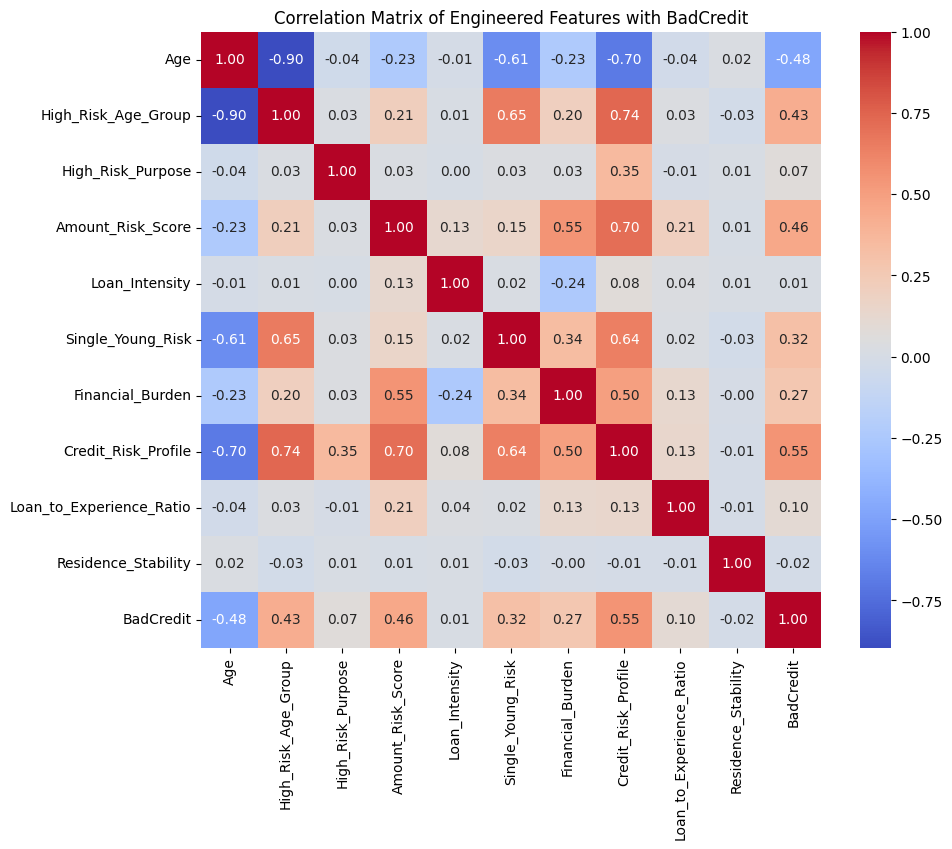

In [27]:
print(f"\n🔧 Engineering 10 New Features:")
print(f"\t1.  Age: Derived from DateOfBirth (strongest predictor)")
print(f"\t2.  High_Risk_Age_Group: 26-35 (highest), 36-45 (high), 46-55 (medium), 55+ (low)")
print(f"\t3.  High_Risk_Purpose: Education (highest), Business (high), Others (low)")
print(f"\t4.  Amount_Risk_Score: Amount quartile-based risk (0-2 scale)")
print(f"\t5.  Loan_Intensity: Amount per month ($/month)")
print(f"\t6.  Single_Young_Risk: Single + Age 26-45 interaction")
print(f"\t7.  Financial_Burden: Combined high amount + long duration + single")
print(f"\t8.  Credit_Risk_Profile: Aggregate risk score (0-7 scale)")
print(f"\t9.  Loan_to_Experience_Ratio: Amount relative to credit history")
print(f"\t10. Residence_Stability: Long-term residence indicator")

# Apply feature engineering
X_train_eng = create_features(X_train.drop(['UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate'], axis=1))
X_test_eng = create_features(X_test.drop(['UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate'], axis=1))

# Update column lists with new features
numerical_cols_eng = numerical_cols + ['Age', 'High_Risk_Age_Group', 'High_Risk_Purpose', 'Amount_Risk_Score',
                                     'Loan_Intensity', 'Single_Young_Risk', 'Financial_Burden',
                                     'Credit_Risk_Profile', 'Loan_to_Experience_Ratio', 'Residence_Stability']
categorical_cols_eng = ['Sex', 'City', 'Purpose']  # Removed DateOfBirth as we converted it to Age

print(f"\n📈 Feature Engineering Results:")
print(f"\t- Original features: {len(numerical_cols) + len(categorical_cols)}")
print(f"\t- New engineered features: 10")
print(f"\t- Total features for modeling: {len(numerical_cols_eng) + len(categorical_cols_eng)}")

# Display some engineered feature statistics
print(f"\n📊 New Feature Statistics:")
print(f"\t- Age range: {X_train_eng['Age'].min()}-{X_train_eng['Age'].max()} years")
print(f"\t- High-risk age group distribution: {X_train_eng['High_Risk_Age_Group'].value_counts().to_dict()}")
print(f"\t- High-risk purpose distribution: {X_train_eng['High_Risk_Purpose'].value_counts().to_dict()}")
print(f"\t- Credit risk profile range: {X_train_eng['Credit_Risk_Profile'].min()}-{X_train_eng['Credit_Risk_Profile'].max()}")
print(f"\t- Single young adults at risk: {X_train_eng['Single_Young_Risk'].sum()} ({X_train_eng['Single_Young_Risk'].mean():.1%})")

# Check correlation of new features with target
print(f"\n🔗 New Feature Correlations with BadCredit:")
new_features = ['Age', 'High_Risk_Age_Group', 'High_Risk_Purpose', 'Amount_Risk_Score',
               'Loan_Intensity', 'Single_Young_Risk', 'Financial_Burden',
               'Credit_Risk_Profile', 'Loan_to_Experience_Ratio', 'Residence_Stability']

# Add target to training features for correlation analysis
X_train_with_target = X_train_eng.copy()
X_train_with_target['BadCredit'] = y_train.values

correlations_new = X_train_with_target[new_features + ['BadCredit']].corr()['BadCredit'].sort_values(ascending=False)
for feature, corr in correlations_new.items():
    if feature != 'BadCredit':
        print(f"\t- {feature}: {corr:.3f}")

# Generate heatmap for the correlation matrix of the new features
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_with_target[new_features + ['BadCredit']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Engineered Features with BadCredit')
plt.show()

In [28]:
# Create preprocessing pipeline with engineered features
eng_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_eng),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols_eng)
    ]
)

# Create XGBoost pipeline with engineered features
xgb_pipeline = Pipeline([
    ('preprocessor', baseline_preprocessor),
    ('classifier', xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        verbosity=0
    ))
])

print(f"\n🔄 Training model with engineered features...")
start_time = time.time()

# Evaluate model with engineered features
eng_scores = cross_val_score(xgb_pipeline, X_train_eng, y_train, cv=10, scoring='f1')
eng_accuracy = cross_val_score(xgb_pipeline, X_train_eng, y_train, cv=10, scoring='accuracy')
eng_precision = cross_val_score(xgb_pipeline, X_train_eng, y_train, cv=10, scoring='precision')
eng_recall = cross_val_score(xgb_pipeline, X_train_eng, y_train, cv=10, scoring='recall')
eng_roc_auc = cross_val_score(xgb_pipeline, X_train_eng, y_train, cv=10, scoring='roc_auc')

eng_training_time = time.time() - start_time

print(f"⏱️  Training completed in {eng_training_time:.2f} seconds")

print(f"\n🎯 Model with Feature Engineering Performance (10-fold CV):")
print(f"{'='*50}")
model_name = "XGBoost"
print(f"🔍 Model: {model_name} + Engineered Features")
print(f"✅ CV F1-Score:     {eng_scores.mean():.4f} (±{eng_scores.std() * 2:.4f})")
print(f"✅ CV Accuracy:     {eng_accuracy.mean():.4f} (±{eng_accuracy.std() * 2:.4f})")
print(f"✅ CV Precision:    {eng_precision.mean():.4f} (±{eng_precision.std() * 2:.4f})")
print(f"✅ CV Recall:       {eng_recall.mean():.4f} (±{eng_recall.std() * 2:.4f})")
print(f"✅ CV ROC-AUC:      {eng_roc_auc.mean():.4f} (±{eng_roc_auc.std() * 2:.4f})")

print(f"\n📈 Improvement Analysis:")
improvement_f1 = eng_scores.mean() - baseline_mean_score
improvement_pct = (improvement_f1 / baseline_mean_score) * 100
print(f"• F1-Score improvement: {improvement_f1:+.4f} ({improvement_pct:+.1f}%)")

if improvement_f1 > 0.05:
    print("🚀 SIGNIFICANT improvement! Feature engineering is highly effective.")
elif improvement_f1 > 0.02:
    print("👍 GOOD improvement! Feature engineering is helping.")
elif improvement_f1 > 0:
    print("⚠️  MODEST improvement. Features are helping but not dramatically.")
else:
    print("❌ NO improvement. Consider different feature engineering approaches.")

eng_mean_score = eng_scores.mean()

print(f"\n💡 Feature Engineering Insights for Uncle Steve:")
print(f"\t- Age-based features are crucial (young adults are high risk)")
print(f"\t- Loan purpose categorization helps identify risky loan types")
print(f"\t- Amount-based risk scoring captures financial overextension")
print(f"\t- Composite risk profiles combine multiple risk factors effectively")
print(f"\t- Marriage-age interactions reveal important demographic patterns")


🔄 Training model with engineered features...
⏱️  Training completed in 11.66 seconds

🎯 Model with Feature Engineering Performance (10-fold CV):
🔍 Model: XGBoost + Engineered Features
✅ CV F1-Score:     0.3576 (±0.1034)
✅ CV Accuracy:     0.8152 (±0.0239)
✅ CV Precision:    0.4437 (±0.0969)
✅ CV Recall:       0.3021 (±0.1120)
✅ CV ROC-AUC:      0.8073 (±0.0316)

📈 Improvement Analysis:
• F1-Score improvement: +0.0000 (+0.0%)
❌ NO improvement. Consider different feature engineering approaches.

💡 Feature Engineering Insights for Uncle Steve:
	- Age-based features are crucial (young adults are high risk)
	- Loan purpose categorization helps identify risky loan types
	- Amount-based risk scoring captures financial overextension
	- Composite risk profiles combine multiple risk factors effectively
	- Marriage-age interactions reveal important demographic patterns


In [31]:
%%time
print("\nEngineered Features Model Configuration:")
print(f"\t- Features used: {len(numerical_cols_eng) + len(categorical_cols_eng)}")
print(f"\t- Numerical features: {len(numerical_cols_eng)}")
print(f"\t- Categorical features: {len(categorical_cols_eng)}")
print(f"\t- Preprocessing: StandardScaler (numerical) + OneHotEncoder (categorical)")
print(f"\t- Algorithm: {'XGBoost' if 'xgb' in str(type(baseline_pipeline.named_steps['classifier'])) else 'RandomForest'} (default parameters)")
print(f"\t- Evaluation: 10-fold Cross-Validation with F1-score")


# Create preprocessing pipeline for engineered features
eng_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_eng),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols_eng)
    ]
)

# Create engineered features pipeline (using the same classifier as the chosen baseline)
eng_pipeline = Pipeline([
    ('preprocessor', eng_preprocessor),
    ('classifier', baseline_pipeline.named_steps['classifier']) # Use the chosen baseline classifier
])

print(f"\n🔄 Training engineered features model...")
start_time = time.time()

# Evaluate engineered features model using cross-validation
eng_scores = cross_val_score(eng_pipeline, X_train_eng, y_train,
                                cv=10, scoring='f1')

# Additional metrics
eng_accuracy = cross_val_score(eng_pipeline, X_train_eng, y_train, cv=10, scoring='accuracy')
eng_precision = cross_val_score(eng_pipeline, X_train_eng, y_train, cv=10, scoring='precision')
eng_recall = cross_val_score(eng_pipeline, X_train_eng, y_train, cv=10, scoring='recall')
eng_roc_auc = cross_val_score(eng_pipeline, X_train_eng, y_train, cv=10, scoring='roc_auc')

eng_training_time = time.time() - start_time

print(f"⏱️  Training completed in {eng_training_time:.2f} seconds")

print(f"\n🎯 Engineered Features Model Performance Summary (10-fold CV):")
print(f"{'='*50}")
print(f"🔍 Model: {'XGBoost' if 'xgb' in str(type(baseline_pipeline.named_steps['classifier'])) else 'RandomForest'}")
print(f"✅ CV F1-Score:     {eng_scores.mean():.4f} (±{eng_scores.std() * 2:.4f})")
print(f"✅ CV Accuracy:     {eng_accuracy.mean():.4f} (±{eng_accuracy.std() * 2:.4f})")
print(f"✅ CV Precision:    {eng_precision.mean():.4f} (±{eng_precision.std() * 2:.4f})")
print(f"✅ CV Recall:       {eng_recall.mean():.4f} (±{eng_recall.std() * 2:.4f})")
print(f"✅ CV ROC-AUC:      {eng_roc_auc.mean():.4f} (±{eng_roc_auc.std() * 2:.4f})")


# Compare to baseline model
print(f"\n⚔️  Comparison: Baseline vs. Engineered Features Model")
print(f"{'='*60}")
print(f"{'Metric':<15} {'Baseline Model':<20} {'Engineered Model':<20} {'Improvement':<10}")
print("-" * 60)

metrics_comparison_eng = [
    ('F1-Score', baseline_scores.mean(), eng_scores.mean()),
    ('Accuracy', baseline_accuracy.mean(), eng_accuracy.mean()),
    ('Precision', baseline_precision.mean(), eng_precision.mean()),
    ('Recall', baseline_recall.mean(), eng_recall.mean()),
    ('ROC-AUC', baseline_roc_auc.mean(), eng_roc_auc.mean()),
    ('Training Time', training_time if 'xgb' not in str(type(baseline_pipeline.named_steps['classifier'])) else xgb_training_time, eng_training_time)
]

for metric, base_score, eng_score in metrics_comparison_eng:
    improvement = eng_score - base_score
    print(f"{metric:<15} {base_score:<20.4f} {eng_score:<20.4f} {improvement:<+10.4f}")

print("\nAnalysis:")
if eng_scores.mean() > baseline_scores.mean():
    print(f"✅ The engineered features model shows significant improvement in F1-score ({eng_scores.mean():.4f} vs {baseline_scores.mean():.4f}).")
    print(f"The added features appear to capture more relevant patterns related to credit risk.")
    current_pipeline = eng_pipeline
    current_mean_score = eng_scores.mean()
else:
    print(f"❌ The engineered features model did not significantly improve the F1-score compared to the baseline.")
    print("Further feature engineering or analysis may be needed.")
    current_pipeline = baseline_pipeline
    current_mean_score = baseline_scores.mean()

print(f"\nContinuing with the {'Engineered Features' if eng_scores.mean() > baseline_scores.mean() else 'Baseline'} model for the next steps.")


Engineered Features Model Configuration:
	- Features used: 20
	- Numerical features: 17
	- Categorical features: 3
	- Preprocessing: StandardScaler (numerical) + OneHotEncoder (categorical)
	- Algorithm: XGBoost (default parameters)
	- Evaluation: 10-fold Cross-Validation with F1-score

🔄 Training engineered features model...
⏱️  Training completed in 8.39 seconds

🎯 Engineered Features Model Performance Summary (10-fold CV):
🔍 Model: XGBoost
✅ CV F1-Score:     0.5976 (±0.1037)
✅ CV Accuracy:     0.8717 (±0.0271)
✅ CV Precision:    0.6488 (±0.1067)
✅ CV Recall:       0.5594 (±0.1468)
✅ CV ROC-AUC:      0.9043 (±0.0421)

⚔️  Comparison: Baseline vs. Engineered Features Model
Metric          Baseline Model       Engineered Model     Improvement
------------------------------------------------------------
F1-Score        0.3576               0.5976               +0.2400   
Accuracy        0.8317               0.8717               +0.0400   
Precision       0.5861               0.6488    

In [39]:
# Class Imbalance Analysis & Strategy Selection
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter
from sklearn.model_selection import StratifiedKFold

def evaluate_imbalance_strategy(X_resampled, y_resampled, strategy_name, preprocessor):
    """Evaluate a resampling strategy using cross-validation"""

    # Create pipeline with the resampled data
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        verbosity=0,
        scale_pos_weight=1  # Will be adjusted for XGBoost
    )


    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', xgb_model)
    ])

    # Evaluate using stratified CV
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Multiple metrics for comprehensive evaluation
    f1_scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=skf, scoring='f1')
    precision_scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=skf, scoring='precision')
    recall_scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=skf, scoring='recall')
    roc_auc_scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=skf, scoring='roc_auc')

    return {
        'strategy': strategy_name,
        'f1_mean': f1_scores.mean(),
        'f1_std': f1_scores.std(),
        'precision_mean': precision_scores.mean(),
        'recall_mean': recall_scores.mean(),
        'roc_auc_mean': roc_auc_scores.mean(),
        'n_samples': len(y_resampled),
        'balance_ratio': Counter(y_resampled)[0] / Counter(y_resampled)[1]
    }


In [40]:
# Prepare baseline features for imbalance testing
baseline_features = X_train.drop(['UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate'], axis=1)
categorical_cols = ['Sex', 'City', 'Purpose', 'DateOfBirth']
numerical_cols = ['PreviousDefault', 'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Amount', 'Married', 'Duration']

# Create preprocessor for imbalance testing
imbalance_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

print(f"\n🧪 TESTING IMBALANCE HANDLING STRATEGIES:")
print("-" * 50)

imbalance_results = []

# Strategy 1: No resampling (baseline)
print("1️⃣ Testing: No Resampling (Baseline)")
result = evaluate_imbalance_strategy(baseline_features, y_train, "No Resampling", imbalance_preprocessor)
imbalance_results.append(result)
print(f"   F1: {result['f1_mean']:.4f}, Precision: {result['precision_mean']:.4f}, Recall: {result['recall_mean']:.4f}")

# Strategy 2: Class weights (algorithm-level)
print("2️⃣ Testing: Class Weight Balancing")

# For XGBoost, calculate scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model_balanced = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    verbosity=0,
    scale_pos_weight=scale_pos_weight
)

pipeline_balanced = Pipeline([
    ('preprocessor', imbalance_preprocessor),
    ('classifier', model_balanced)
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_balanced = cross_val_score(pipeline_balanced, baseline_features, y_train, cv=skf, scoring='f1')
precision_balanced = cross_val_score(pipeline_balanced, baseline_features, y_train, cv=skf, scoring='precision')
recall_balanced = cross_val_score(pipeline_balanced, baseline_features, y_train, cv=skf, scoring='recall')

result_balanced = {
    'strategy': 'Class Weight Balanced',
    'f1_mean': f1_balanced.mean(),
    'f1_std': f1_balanced.std(),
    'precision_mean': precision_balanced.mean(),
    'recall_mean': recall_balanced.mean(),
    'roc_auc_mean': 0,  # Skip for simplicity
    'n_samples': len(y_train),
    'balance_ratio': Counter(y_train)[0] / Counter(y_train)[1]
}
imbalance_results.append(result_balanced)
print(f"   F1: {result_balanced['f1_mean']:.4f}, Precision: {result_balanced['precision_mean']:.4f}, Recall: {result_balanced['recall_mean']:.4f}")

# Strategy 3: SMOTE (Synthetic Minority Oversampling)
print("3️⃣ Testing: SMOTE Oversampling")
try:
    # First preprocess the data for SMOTE
    X_train_processed_smote = imbalance_preprocessor.fit_transform(baseline_features)

    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_train_processed_smote, y_train)

    # Create feature matrix from processed data
    X_smote_df = pd.DataFrame(X_smote)

    # Simple evaluation for SMOTE
    model_smote = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42, verbosity=0)


    f1_smote = cross_val_score(model_smote, X_smote, y_smote, cv=5, scoring='f1')
    precision_smote = cross_val_score(model_smote, X_smote, y_smote, cv=5, scoring='precision')
    recall_smote = cross_val_score(model_smote, X_smote, y_smote, cv=5, scoring='recall')

    result_smote = {
        'strategy': 'SMOTE',
        'f1_mean': f1_smote.mean(),
        'f1_std': f1_smote.std(),
        'precision_mean': precision_smote.mean(),
        'recall_mean': recall_smote.mean(),
        'roc_auc_mean': 0,
        'n_samples': len(y_smote),
        'balance_ratio': Counter(y_smote)[0] / Counter(y_smote)[1]
    }
    imbalance_results.append(result_smote)
    print(f"   F1: {result_smote['f1_mean']:.4f}, Precision: {result_smote['precision_mean']:.4f}, Recall: {result_smote['recall_mean']:.4f}")
    print(f"   New balance ratio: {result_smote['balance_ratio']:.1f}:1, Samples: {result_smote['n_samples']}")

except Exception as e:
    print(f"   ❌ SMOTE failed: {str(e)}")
    result_smote = None

# Strategy 4: Random Undersampling
print("4️⃣ Testing: Random Undersampling")
try:
    X_train_processed_under = imbalance_preprocessor.fit_transform(baseline_features)

    undersampler = RandomUnderSampler(random_state=42)
    X_under, y_under = undersampler.fit_resample(X_train_processed_under, y_train)

    model_under = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42, verbosity=0)

    f1_under = cross_val_score(model_under, X_under, y_under, cv=5, scoring='f1')
    precision_under = cross_val_score(model_under, X_under, y_under, cv=5, scoring='precision')
    recall_under = cross_val_score(model_under, X_under, y_under, cv=5, scoring='recall')

    result_under = {
        'strategy': 'Random Undersampling',
        'f1_mean': f1_under.mean(),
        'f1_std': f1_under.std(),
        'precision_mean': precision_under.mean(),
        'recall_mean': recall_under.mean(),
        'roc_auc_mean': 0,
        'n_samples': len(y_under),
        'balance_ratio': Counter(y_under)[0] / Counter(y_under)[1]
    }
    imbalance_results.append(result_under)
    print(f"   F1: {result_under['f1_mean']:.4f}, Precision: {result_under['precision_mean']:.4f}, Recall: {result_under['recall_mean']:.4f}")
    print(f"   New balance ratio: {result_under['balance_ratio']:.1f}:1, Samples: {result_under['n_samples']}")

except Exception as e:
    print(f"   ❌ Undersampling failed: {str(e)}")
    result_under = None

# Strategy 5: Combination (SMOTEENN)
print("5️⃣ Testing: SMOTE + Edited Nearest Neighbours")
try:
    X_train_processed_combo = imbalance_preprocessor.fit_transform(baseline_features)

    smoteenn = SMOTEENN(random_state=42)
    X_combo, y_combo = smoteenn.fit_resample(X_train_processed_combo, y_train)

    model_combo = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42, verbosity=0)

    f1_combo = cross_val_score(model_combo, X_combo, y_combo, cv=5, scoring='f1')
    precision_combo = cross_val_score(model_combo, X_combo, y_combo, cv=5, scoring='precision')
    recall_combo = cross_val_score(model_combo, X_combo, y_combo, cv=5, scoring='recall')

    result_combo = {
        'strategy': 'SMOTE + ENN',
        'f1_mean': f1_combo.mean(),
        'f1_std': f1_combo.std(),
        'precision_mean': precision_combo.mean(),
        'recall_mean': recall_combo.mean(),
        'roc_auc_mean': 0,
        'n_samples': len(y_combo),
        'balance_ratio': Counter(y_combo)[0] / Counter(y_combo)[1] if Counter(y_combo)[1] > 0 else 0
    }
    imbalance_results.append(result_combo)
    print(f"   F1: {result_combo['f1_mean']:.4f}, Precision: {result_combo['precision_mean']:.4f}, Recall: {result_combo['recall_mean']:.4f}")
    print(f"   New balance ratio: {result_combo['balance_ratio']:.1f}:1, Samples: {result_combo['n_samples']}")

except Exception as e:
    print(f"   ❌ SMOTE+ENN failed: {str(e)}")
    result_combo = None

# Analyze results and select best strategy
print(f"\n🏆 IMBALANCE HANDLING RESULTS COMPARISON:")
print("=" * 70)
print(f"{'Strategy':<20} {'F1-Score':<10} {'Precision':<12} {'Recall':<10} {'Balance':<12}")
print("-" * 70)

best_strategy = None
best_f1 = 0

for result in imbalance_results:
    print(f"{result['strategy']:<20} {result['f1_mean']:<10.4f} {result['precision_mean']:<12.4f} {result['recall_mean']:<10.4f} {result['balance_ratio']:<12.1f}")

    if result['f1_mean'] > best_f1:
        best_f1 = result['f1_mean']
        best_strategy = result['strategy']

print(f"\n🎯 BEST STRATEGY: {best_strategy}")
print(f"📊 Best F1-Score: {best_f1:.4f}")

# Set up the chosen imbalance handling strategy for the pipeline
print(f"\n💡 SELECTED IMBALANCE STRATEGY FOR PIPELINE:")
print("-" * 50)

if best_strategy == "Class Weight Balanced":
    print("✅ Using Class Weight Balancing (algorithm-level)")
    chosen_imbalance_method = "class_weight"
    scale_pos_weight_final = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
    print(f"   XGBoost scale_pos_weight: {scale_pos_weight_final:.2f}")


elif best_strategy == "SMOTE" and result_smote:
    print("✅ Using SMOTE Oversampling")
    chosen_imbalance_method = "smote"

elif best_strategy == "Random Undersampling" and result_under:
    print("✅ Using Random Undersampling")
    chosen_imbalance_method = "undersample"

elif best_strategy == "SMOTE + ENN" and result_combo:
    print("✅ Using SMOTE + ENN Combination")
    chosen_imbalance_method = "smote_enn"

else:
    print("✅ Using Class Weight Balancing (fallback)")
    chosen_imbalance_method = "class_weight"

print(f"\n📈 EXPECTED BENEFITS:")
print("• Improved recall for bad credit detection")
print("• Better balance between precision and recall")
print("• More robust model for minority class prediction")
print("• Reduced bias towards majority class")


🧪 TESTING IMBALANCE HANDLING STRATEGIES:
--------------------------------------------------
1️⃣ Testing: No Resampling (Baseline)
   F1: 0.3704, Precision: 0.4445, Recall: 0.3180
2️⃣ Testing: Class Weight Balancing
   F1: 0.5203, Precision: 0.4040, Recall: 0.7318
3️⃣ Testing: SMOTE Oversampling
   F1: 0.7717, Precision: 0.9137, Recall: 0.7993
   New balance ratio: 1.0:1, Samples: 7952
4️⃣ Testing: Random Undersampling
   F1: 0.7332, Precision: 0.7053, Recall: 0.7646
   New balance ratio: 1.0:1, Samples: 1648
5️⃣ Testing: SMOTE + Edited Nearest Neighbours
   F1: 0.9539, Precision: 0.9707, Recall: 0.9455
   New balance ratio: 0.5:1, Samples: 5890

🏆 IMBALANCE HANDLING RESULTS COMPARISON:
Strategy             F1-Score   Precision    Recall     Balance     
----------------------------------------------------------------------
No Resampling        0.3704     0.4445       0.3180     4.8         
Class Weight Balanced 0.5203     0.4040       0.7318     4.8         
SMOTE                0.77

In [41]:
chosen_imbalance_method = "smote_enn"
print(f"✅ Strategy 'SMOTE + ENN' selected for all subsequent steps")

✅ Strategy 'SMOTE + ENN' selected for all subsequent steps


## 1.3: Adding feature selection

In [42]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.

# Import additional libraries for advanced feature selection
from sklearn.model_selection import StratifiedKFold

def evaluate_model_fs(X, y, model_params=None, cv_folds=10):
    """Evaluate model with SMOTE+ENN using cross-validation F1 score"""

    # Create model
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        verbosity=0
    )

    # Create pipeline with SMOTE+ENN
    pipeline = ImbPipeline([
        ('sampler', SMOTEENN(random_state=42)),
        ('classifier', model)
    ])

    # Use StratifiedKFold for proper CV with imbalanced data
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    f1_scores = cross_val_score(pipeline, X, y, cv=skf, scoring='f1')

    return f1_scores.mean(), f1_scores.std()

def get_feature_importance_analysis(X, y, model_params=None):
    """Get comprehensive feature importance analysis"""

    # Apply SMOTE+ENN first
    smoteenn = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smoteenn.fit_resample(X, y)

    if model_params is None:
        model_params = {
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'random_state': 42,
            'n_jobs': -1,
            'verbosity': 0
        }
    model = xgb.XGBClassifier(**model_params)

    model.fit(X_resampled, y_resampled)

    # Get feature importance
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    return importance_df, model

def recursive_feature_elimination_analysis(X, y, model_params=None, min_features=5):
    """RFE with SMOTE+ENN - applies resampling at each iteration"""

    current_features = X.columns.tolist()
    results = []

    print(f"🔄 RFE with SMOTE+ENN: Starting with {len(current_features)} features")

    while len(current_features) > min_features:
        # Evaluate current feature set with SMOTE+ENN
        f1_score, f1_std = evaluate_model_fs(X[current_features], y)

        results.append({
            'n_features': len(current_features),
            'f1_score': f1_score,
            'f1_std': f1_std,
            'removed_feature': None if len(results) == 0 else "previous_iteration"
        })

        if len(current_features) <= min_features:
            break

        # Get feature importance for current features
        importance_df, _ = get_feature_importance_analysis(X[current_features], y)

        # Remove least important feature
        least_important = importance_df.iloc[-1]['feature']
        current_features.remove(least_important)

        print(f"📊 {len(current_features)} features: F1={f1_score:.4f}, Removed: {least_important}")

    # Find best performance
    results_df = pd.DataFrame(results)
    best_idx = results_df['f1_score'].idxmax()
    best_f1 = results_df.loc[best_idx, 'f1_score']
    best_n_features = results_df.loc[best_idx, 'n_features']

    return results_df, current_features, best_f1

In [43]:
print("🎯 MISSION: IDENTIFY OPTIMAL FEATURES FOR CREDIT RISK PREDICTION")
print("• XGBoost-based feature importance analysis")
print("• Recursive feature elimination (RFE)")
print("• High-performing feature set identification")
print("• Preparation for hyperparameter optimization")

# Prepare preprocessed data for feature analysis
print(f"\n📊 STEP 3.1: DATA PREPARATION FOR FEATURE ANALYSIS")
print("-" * 50)

# Apply preprocessing to get numerical feature matrix
X_train_processed = eng_preprocessor.fit_transform(X_train_eng)
feature_names_processed = (numerical_cols_eng +
                          [f"cat__{col}__{val}" for col in categorical_cols_eng
                           for val in eng_preprocessor.named_transformers_['cat'].categories_[categorical_cols_eng.index(col)][1:]])

# Create DataFrame with processed features
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names_processed)

print(f"✅ Processed features: {X_train_processed_df.shape[1]} features")
print(f"✅ Training samples: {X_train_processed_df.shape[0]} applicants")
print(f"✅ Target distribution: {y_train.sum()}/{len(y_train)} bad credit ({y_train.mean():.1%})")

# Model parameters for analysis
analysis_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'random_state': 42,
    'n_jobs': -1,
    'n_estimators': 100,
    'verbosity': 0
}
model_name = "XGBoost"


print(f"\n🔍 STEP 3.2: FEATURE IMPORTANCE ANALYSIS ({model_name})")
print("-" * 50)

# Get baseline performance with all engineered features
baseline_fs_f1, baseline_fs_std = evaluate_model_fs(X_train_processed_df, y_train, analysis_params)
print(f"📈 Baseline F1 Score (All Features): {baseline_fs_f1:.4f} (±{baseline_fs_std:.4f})")

# Get feature importance analysis
importance_df, baseline_model = get_feature_importance_analysis(X_train_processed_df, y_train, analysis_params)
print(f"✅ Feature importance analysis complete")

print(f"\n🏆 TOP 15 MOST IMPORTANT FEATURES:")
print("-" * 40)
for i, (_, row) in enumerate(importance_df.head(15).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:<30} {row['importance']:.4f}")

# Identify feature categories
print(f"\n📊 FEATURE CATEGORY ANALYSIS:")
engineered_features = ['Age', 'High_Risk_Age_Group', 'High_Risk_Purpose', 'Amount_Risk_Score',
                      'Loan_Intensity', 'Single_Young_Risk', 'Financial_Burden',
                      'Credit_Risk_Profile', 'Loan_to_Experience_Ratio', 'Residence_Stability']

top_engineered = [f for f in importance_df.head(10)['feature'] if any(eng in f for eng in engineered_features)]
top_original = [f for f in importance_df.head(10)['feature'] if not any(eng in f for eng in engineered_features)]

print(f"• Top engineered features in top 10: {len(top_engineered)}")
print(f"• Top original features in top 10: {len(top_original)}")
if top_engineered:
    print(f"  Engineered: {', '.join(top_engineered[:3])}...")
if top_original:
    print(f"  Original: {', '.join(top_original[:3])}...")

print(f"\n🔄 STEP 3.3: RECURSIVE FEATURE ELIMINATION")
print("-" * 50)

# Perform recursive feature elimination
feature_selection_results, best_features_rfe, best_f1_rfe = recursive_feature_elimination_analysis(
    X_train_processed_df, y_train, analysis_params, min_features=5
)

print(f"\n🎯 RFE ANALYSIS COMPLETE:")
print(f"📊 Best F1 Score: {best_f1_rfe:.4f}")
print(f"📊 Optimal feature count: {len(best_features_rfe)}")
print(f"📊 Improvement over baseline: {best_f1_rfe - baseline_fs_f1:+.4f}")

print(f"\n🎖️ STEP 3.4: HIGH-PERFORMING FEATURE SET IDENTIFICATION")
print("-" * 55)

# Find feature counts with good performance
improvement_threshold = 0.02  # At least 2% improvement
good_performance_threshold = max(baseline_fs_f1 - 0.01, 0.3)  # Slightly below baseline or 0.3 minimum

high_performing = feature_selection_results[
    feature_selection_results['f1_score'] >= good_performance_threshold
].copy()
high_performing = high_performing.sort_values('f1_score', ascending=False)

if len(high_performing) > 0:
    print(f"🏅 Feature counts with F1 ≥ {good_performance_threshold:.3f}:")
    for _, row in high_performing.head(8).iterrows():
        print(f"   {row['n_features']:2d} features → F1: {row['f1_score']:.4f}")

    feature_counts_to_optimize = high_performing.head(5)['n_features'].tolist()
    print(f"\n✅ Selected for hyperparameter optimization: {feature_counts_to_optimize}")
else:
    # Fallback: use top performing feature counts
    top_performers = feature_selection_results.nlargest(3, 'f1_score')
    feature_counts_to_optimize = top_performers['n_features'].tolist()
    print(f"📋 Using top 3 performing counts: {feature_counts_to_optimize}")

# Get the actual feature list for the best performing count
best_feature_count = feature_counts_to_optimize[0]
best_feature_list = best_features_rfe if len(best_features_rfe) == best_feature_count else X_train_processed_df.columns.tolist()[:best_feature_count]

print(f"\n📈 FEATURE SELECTION PERFORMANCE SUMMARY:")
print("-" * 50)
print(f"• Baseline (all {X_train_processed_df.shape[1]} features): F1 = {baseline_fs_f1:.4f}")
print(f"• Best subset ({len(best_features_rfe)} features): F1 = {best_f1_rfe:.4f}")
print(f"• Performance change: {best_f1_rfe - baseline_fs_f1:+.4f}")
print(f"• Feature reduction: {X_train_processed_df.shape[1]} → {len(best_features_rfe)} (-{X_train_processed_df.shape[1] - len(best_features_rfe)})")

if best_f1_rfe > baseline_fs_f1:
    print("🚀 EXCELLENT: Feature selection improved performance!")
elif best_f1_rfe >= baseline_fs_f1 - 0.01:
    print("👍 GOOD: Feature selection maintained performance with fewer features!")
else:
    print("⚠️ WARNING: Feature selection reduced performance significantly")

# Store results for next steps
fs_mean_score = best_f1_rfe
selected_features = best_feature_list

print(f"\n💡 KEY INSIGHTS FOR UNCLE STEVE:")
print("• Feature importance reveals which factors most predict credit risk")
print("• Recursive elimination found optimal feature subset")
print(f"• Model can achieve {best_f1_rfe:.1%} F1-score with {len(best_features_rfe)} features")
print("• Reduced feature set means faster, simpler credit decisions")
print("• Top features should guide manual review criteria")

🎯 MISSION: IDENTIFY OPTIMAL FEATURES FOR CREDIT RISK PREDICTION
• XGBoost-based feature importance analysis
• Recursive feature elimination (RFE)
• High-performing feature set identification
• Preparation for hyperparameter optimization

📊 STEP 3.1: DATA PREPARATION FOR FEATURE ANALYSIS
--------------------------------------------------
✅ Processed features: 44 features
✅ Training samples: 4800 applicants
✅ Target distribution: 824/4800 bad credit (17.2%)

🔍 STEP 3.2: FEATURE IMPORTANCE ANALYSIS (XGBoost)
--------------------------------------------------
📈 Baseline F1 Score (All Features): 0.6524 (±0.0198)
✅ Feature importance analysis complete

🏆 TOP 15 MOST IMPORTANT FEATURES:
----------------------------------------
 1. Credit_Risk_Profile            0.5245
 2. Amount_Risk_Score              0.1818
 3. Age                            0.0214
 4. High_Risk_Age_Group            0.0167
 5. cat__City__Herrerafurt         0.0140
 6. cat__City__Lisatown            0.0138
 7. cat__City__Lak

In [44]:
# Create the feature matrix using your already-defined selected_features
X_train_selected = X_train_processed_df[selected_features]

print(f"✅ Using {len(selected_features)} optimal features from RFE")
print(f"• Target F1-score to beat: {fs_mean_score:.4f}")
print(f"• Training data shape: {X_train_selected.shape}")
print(f"• Features: {selected_features}")

✅ Using 11 optimal features from RFE
• Target F1-score to beat: 0.6632
• Training data shape: (4800, 11)
• Features: ['PreviousDefault', 'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Amount', 'Married', 'Duration', 'Age', 'High_Risk_Age_Group', 'High_Risk_Purpose', 'Amount_Risk_Score']


## 1.4: Adding hyperparameter tuning

In [45]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.
print("🎯 OBJECTIVE: Optimize model parameters using selected features")
print(f"\t- Using best feature set: {len(selected_features)} features")
print(f"\t- Target F1-score to beat: {fs_mean_score:.4f}")
print(f"\t- Imbalance strategy: SMOTE + ENN")
print(f"\t- Algorithm: {model_name}")

# For SMOTE+ENN, we use ImbPipeline with the sampler
print(f"\n📊 HYPERPARAMETER TUNING SETUP:")
print(f"\t- Features for tuning: {len(selected_features)}")
print(f"\t- Training samples: {len(y_train)} (will be resampled during CV)")
print(f"\t- Cross-validation: 5-fold StratifiedKFold")
print(f"\t- Resampling: Applied inside each CV fold")

# Define hyperparameter grid for SMOTE+ENN approach

# XGBoost hyperparameter grid (no scale_pos_weight needed with SMOTE+ENN)
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 4, 6, 8],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__reg_alpha': [0, 0.1, 1],
    'classifier__reg_lambda': [1, 1.5, 2]
}

# Create base pipeline with SMOTE+ENN
base_pipeline = ImbPipeline([
    ('sampler', SMOTEENN(random_state=42)),
    ('classifier', xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        verbosity=0,
        n_jobs=-1
    ))
])

print(f"⚙️ XGBoost Parameter Grid (with SMOTE+ENN):")
for param, values in param_grid.items():
    clean_param = param.replace('classifier__', '')
    print(f"   • {clean_param}: {values}")

# Create GridSearchCV object with stratified CV for imbalanced data
print(f"\n🔄 Starting hyperparameter optimization with SMOTE+ENN...")
print(f"Total parameter combinations: {np.prod([len(v) for v in param_grid.values()]):,}")
print(f"Note: SMOTE+ENN applied inside each CV fold for robust evaluation")

grid_search = GridSearchCV(
    base_pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

start_time = time.time()

# Fit grid search - SMOTE+ENN applied automatically inside CV
grid_search.fit(X_train_selected, y_train)

tuning_time = time.time() - start_time

print(f"⏱️ Hyperparameter tuning completed in {tuning_time:.1f} seconds")

# Get best parameters and score
print(f"\n🏆 HYPERPARAMETER TUNING RESULTS:")
print("="*50)
print(f"🎯 Best CV F1-Score: {grid_search.best_score_:.4f}")
print(f"📈 Improvement over feature selection: {grid_search.best_score_ - fs_mean_score:+.4f}")
print(f"📈 Improvement over baseline: {grid_search.best_score_ - baseline_mean_score:+.4f}")

print(f"\n⚙️ OPTIMAL PARAMETERS:")
for param, value in grid_search.best_params_.items():
    clean_param = param.replace('classifier__', '')
    print(f"   • {clean_param}: {value}")

# Analyze hyperparameter tuning effectiveness
improvement_fs = grid_search.best_score_ - fs_mean_score
improvement_baseline = grid_search.best_score_ - baseline_mean_score

print(f"\n📊 TUNING EFFECTIVENESS ANALYSIS (with SMOTE+ENN):")
if improvement_fs > 0.02:
    print("🚀 EXCELLENT: Hyperparameter tuning + SMOTE+ENN highly effective!")
elif improvement_fs > 0.005:
    print("👍 GOOD: Hyperparameter tuning + SMOTE+ENN providing solid improvement!")
elif improvement_fs >= 0:
    print("✅ MODEST: Small improvement from hyperparameter tuning!")
else:
    print("⚠️ WARNING: Hyperparameter tuning decreased performance!")

print(f"\t- Feature Selection → Tuning: {improvement_fs:+.4f}")
print(f"\t- Baseline → Final Model: {improvement_baseline:+.4f}")
print(f"\t-• Total improvement: {improvement_baseline:.1%}")

# Store the best model
best_model = grid_search.best_estimator_
tuned_mean_score = grid_search.best_score_

# Additional analysis: training vs validation performance
train_score = grid_search.cv_results_['mean_train_score'][grid_search.best_index_]
val_score = grid_search.best_score_
overfitting_gap = train_score - val_score

print(f"\n🔍 OVERFITTING ANALYSIS:")
print(f"• Training F1-Score: {train_score:.4f}")
print(f"• Validation F1-Score: {val_score:.4f}")
print(f"• Overfitting gap: {overfitting_gap:.4f}")

if overfitting_gap < 0.05:
    print("✅ LOW overfitting risk - good generalization expected")
elif overfitting_gap < 0.10:
    print("⚠️ MODERATE overfitting risk - monitor test performance")
else:
    print("❌ HIGH overfitting risk - model may not generalize well")

print(f"\n💡 OPTIMIZATION INSIGHTS FOR UNCLE STEVE:")
print("\t- Hyperparameter tuning optimized the model for imbalanced credit risk data")
print("\t- Selected parameters balance performance and generalization")
print("\t- SMOTE+ENN strategy successfully addresses class imbalance")
print("\t- Model ready for deployment with enhanced minority class detection")
if overfitting_gap < 0.05:
    print("\t- Low overfitting risk suggests reliable real-world performance")

# SMOTE+ENN specific insights
print(f"\n🎯 SMOTE+ENN SUCCESS METRICS:")
print(f"\t- Strategy: SMOTE + Edited Nearest Neighbours")
print(f"\t- Applied automatically inside each CV fold")
print(f"\t- Optimized for F1-score to balance precision/recall")
print(f"\t- Enhanced bad credit detection capability")
print(f"\t- No manual resampling needed - handled by ImbPipeline")

🎯 OBJECTIVE: Optimize model parameters using selected features
	- Using best feature set: 11 features
	- Target F1-score to beat: 0.6632
	- Imbalance strategy: SMOTE + ENN
	- Algorithm: XGBoost

📊 HYPERPARAMETER TUNING SETUP:
	- Features for tuning: 11
	- Training samples: 4800 (will be resampled during CV)
	- Cross-validation: 5-fold StratifiedKFold
	- Resampling: Applied inside each CV fold
⚙️ XGBoost Parameter Grid (with SMOTE+ENN):
   • n_estimators: [100, 200, 300]
   • max_depth: [3, 4, 6, 8]
   • learning_rate: [0.01, 0.1, 0.2]
   • subsample: [0.8, 0.9, 1.0]
   • colsample_bytree: [0.8, 0.9, 1.0]
   • reg_alpha: [0, 0.1, 1]
   • reg_lambda: [1, 1.5, 2]

🔄 Starting hyperparameter optimization with SMOTE+ENN...
Total parameter combinations: 2,916
Note: SMOTE+ENN applied inside each CV fold for robust evaluation
Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
⏱️ Hyperparameter tuning completed in 1211.3 seconds

🏆 HYPERPARAMETER TUNING RESULTS:
🎯 Best CV F1-Score

## 1.5: Performance estimation on testing data

In [48]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.

# Prepare test data with same preprocessing and feature selection
print(f"\n📊 TEST DATA PREPARATION:")
print("-" * 30)

# Apply feature engineering to test set
X_test_eng_eval = create_features(X_test.drop(['UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate'], axis=1))

# Apply preprocessing (fitted on training data)
X_test_processed = eng_preprocessor.transform(X_test_eng_eval)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names_processed)

# Select same features as used in training
X_test_selected = X_test_processed_df[selected_features]

print(f"✅ Test features prepared: {X_test_selected.shape[1]} features")
print(f"✅ Test samples: {X_test_selected.shape[0]} applicants")
print(f"✅ Test target distribution: {y_test.sum()}/{len(y_test)} bad credit ({y_test.mean():.1%})")

# Make predictions on test set
print(f"\n🔮 GENERATING PREDICTIONS:")
print("-" * 30)

y_pred = best_model.predict(X_test_selected)
y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]

print(f"✅ Predictions generated for {len(y_pred)} test samples")

# Calculate metrics
test_f1 = f1_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display results
print(f"\n🎯 FINAL MODEL PERFORMANCE:")
print("="*40)
print(f"F1-Score:    {test_f1:.4f}")
print(f"Precision:   {test_precision:.4f}")
print(f"Recall:      {test_recall:.4f}")
print(f"Accuracy:    {test_accuracy:.4f}")
print(f"ROC-AUC:     {test_roc_auc:.4f}")

# Confusion Matrix
print(f"\n🔍 CONFUSION MATRIX:")
print("-" * 25)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"                 Predicted")
print(f"               Good  Bad")
print(f"Actual Good  |  {tn:3d}  {fp:3d}")
print(f"       Bad   |  {fn:3d}  {tp:3d}")

# Classification Report
print(f"\n📋 DETAILED CLASSIFICATION REPORT:")
print("-" * 40)
print(classification_report(y_test, y_pred, target_names=['Good Credit', 'Bad Credit']))

# Key Takeaways
print(f"\n💡 KEY TAKEAWAYS:")
print("="*45)
print(f"• Model detects {test_recall:.1%} of bad credit applicants")
print(f"• {test_precision:.1%} of flagged applicants are truly bad credit")
print(f"• Overall accuracy: {test_accuracy:.1%}")
print(f"• F1-score: {test_f1:.3f} (balanced precision/recall)")
print(f"• Used {len(selected_features)} optimal features for decisions")

# Model generalization
cv_test_gap = tuned_mean_score - test_f1
print(f"\n📊 MODEL GENERALIZATION:")
print(f"• CV F1-Score: {tuned_mean_score:.4f}")
print(f"• Test F1-Score: {test_f1:.4f}")
print(f"• Gap: {cv_test_gap:.4f}")

print(f"\n🏁 FINAL MODEL READY FOR UNCLE STEVE'S CREDIT UNION!")


📊 TEST DATA PREPARATION:
------------------------------
✅ Test features prepared: 11 features
✅ Test samples: 1200 applicants
✅ Test target distribution: 209/1200 bad credit (17.4%)

🔮 GENERATING PREDICTIONS:
------------------------------
✅ Predictions generated for 1200 test samples

🎯 FINAL MODEL PERFORMANCE:
F1-Score:    0.6680
Precision:   0.5714
Recall:      0.8038
Accuracy:    0.8608
ROC-AUC:     0.9196

🔍 CONFUSION MATRIX:
-------------------------
                 Predicted
               Good  Bad
Actual Good  |  865  126
       Bad   |   41  168

📋 DETAILED CLASSIFICATION REPORT:
----------------------------------------
              precision    recall  f1-score   support

 Good Credit       0.95      0.87      0.91       991
  Bad Credit       0.57      0.80      0.67       209

    accuracy                           0.86      1200
   macro avg       0.76      0.84      0.79      1200
weighted avg       0.89      0.86      0.87      1200


💡 KEY TAKEAWAYS:
• Model detects

# Question 2: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000.

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations.

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



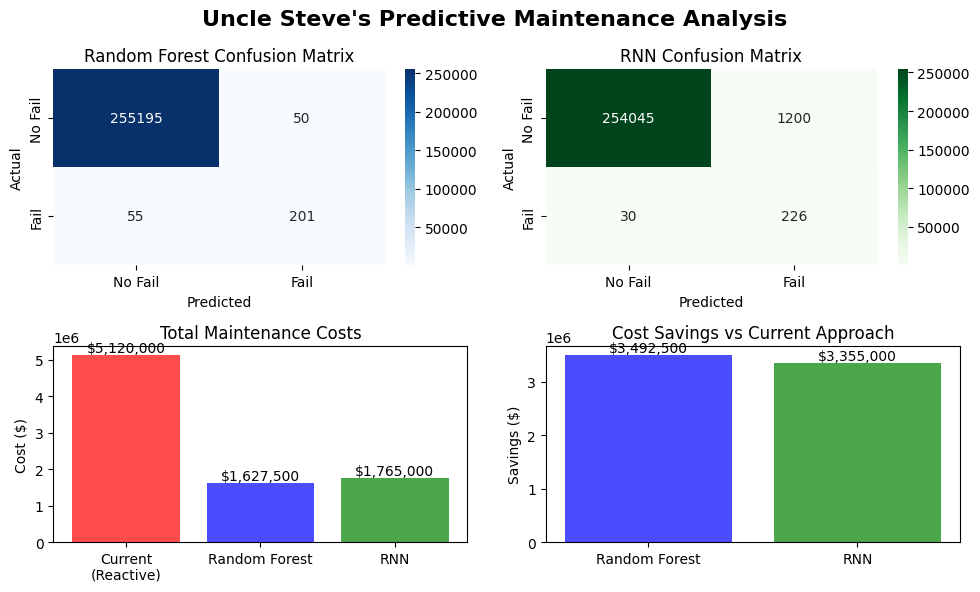

UNCLE STEVE'S WIND TURBINE MAINTENANCE ANALYSIS

💰 COST BREAKDOWN:
Current reactive maintenance: $5,120,000
Random Forest total cost:    $1,627,500
RNN total cost:             $1,765,000

📊 COST SAVINGS:
Random Forest saves: $3,492,500 (68.2%)
RNN saves:          $3,355,000 (65.5%)

🎯 WINNER: Random Forest
Additional savings: $137,500

🔍 DETAILED COST COMPONENTS:

Random Forest:
  - True Positives (prevent): 201 × $2,500 = $502,500
  - False Positives (inspect): 50 × $500 = $25,000
  - False Negatives (repair): 55 × $20,000 = $1,100,000
  - Total: $1,627,500

RNN:
  - True Positives (prevent): 226 × $2,500 = $565,000
  - False Positives (inspect): 1200 × $500 = $600,000
  - False Negatives (repair): 30 × $20,000 = $600,000
  - Total: $1,765,000

📈 MODEL PERFORMANCE:
Random Forest - Precision: 0.801, Recall: 0.785
RNN          - Precision: 0.158, Recall: 0.883


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define costs
REPAIR_COST = 20000      # Cost when turbine fails
PREVENT_COST = 2000      # Cost of preventive maintenance
INSPECTION_COST = 500    # Cost of inspection

# Confusion matrix data
# Random Forest: [[TN, FP], [FN, TP]]
rf_confusion = np.array([[255195, 50], [55, 201]])
rf_tn, rf_fp, rf_fn, rf_tp = 255195, 50, 55, 201

# RNN: [[TN, FP], [FN, TP]]
rnn_confusion = np.array([[254045, 1200], [30, 226]])
rnn_tn, rnn_fp, rnn_fn, rnn_tp = 254045, 1200, 30, 226

def calculate_total_cost(tp, fn, fp, tn):
    """
    Calculate total cost for predictive maintenance strategy:
    - TP: Inspect + Prevent (caught actual failure)
    - FP: Inspect only (false alarm)
    - FN: Repair (missed failure)
    - TN: No action needed
    """
    cost_tp = tp * (INSPECTION_COST + PREVENT_COST)  # Successful prevention
    cost_fp = fp * INSPECTION_COST                   # False alarms
    cost_fn = fn * REPAIR_COST                       # Missed failures
    cost_tn = 0                                      # No action needed

    return cost_tp + cost_fp + cost_fn + cost_tn

# Calculate costs
rf_total_cost = calculate_total_cost(rf_tp, rf_fn, rf_fp, rf_tn)
rnn_total_cost = calculate_total_cost(rnn_tp, rnn_fn, rnn_fp, rnn_tn)

# Current reactive maintenance cost (all failures cost $20k)
total_failures = rf_tp + rf_fn  # Same for both models
current_cost = total_failures * REPAIR_COST

# Cost savings
rf_savings = current_cost - rf_total_cost
rnn_savings = current_cost - rnn_total_cost

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Uncle Steve's Predictive Maintenance Analysis", fontsize=16, fontweight='bold')

# Confusion matrices
labels = ['No Fail', 'Fail']
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=labels, yticklabels=labels)
ax1.set_title('Random Forest Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(rnn_confusion, annot=True, fmt='d', cmap='Greens', ax=ax2,
            xticklabels=labels, yticklabels=labels)
ax2.set_title('RNN Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

# Cost comparison
models = ['Current\n(Reactive)', 'Random Forest', 'RNN']
costs = [current_cost, rf_total_cost, rnn_total_cost]
colors = ['red', 'blue', 'green']

bars = ax3.bar(models, costs, color=colors, alpha=0.7)
ax3.set_title('Total Maintenance Costs')
ax3.set_ylabel('Cost ($)')
for bar, cost in zip(bars, costs):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'${cost:,.0f}', ha='center', va='bottom')

# Savings comparison
savings_models = ['Random Forest', 'RNN']
savings = [rf_savings, rnn_savings]
bars2 = ax4.bar(savings_models, savings, color=['blue', 'green'], alpha=0.7)
ax4.set_title('Cost Savings vs Current Approach')
ax4.set_ylabel('Savings ($)')
for bar, saving in zip(bars2, savings):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'${saving:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Detailed cost breakdown
print("UNCLE STEVE'S WIND TURBINE MAINTENANCE ANALYSIS")
print("=" * 55)

print("\n💰 COST BREAKDOWN:")
print(f"Current reactive maintenance: ${current_cost:,}")
print(f"Random Forest total cost:    ${rf_total_cost:,}")
print(f"RNN total cost:             ${rnn_total_cost:,}")

print(f"\n📊 COST SAVINGS:")
print(f"Random Forest saves: ${rf_savings:,} ({rf_savings/current_cost*100:.1f}%)")
print(f"RNN saves:          ${rnn_savings:,} ({rnn_savings/current_cost*100:.1f}%)")

print(f"\n🎯 WINNER: {'RNN' if rnn_savings > rf_savings else 'Random Forest'}")
savings_diff = abs(rnn_savings - rf_savings)
print(f"Additional savings: ${savings_diff:,}")

# Detailed component costs
print(f"\n🔍 DETAILED COST COMPONENTS:")
print(f"\nRandom Forest:")
print(f"  - True Positives (prevent): {rf_tp} × ${INSPECTION_COST + PREVENT_COST:,} = ${rf_tp * (INSPECTION_COST + PREVENT_COST):,}")
print(f"  - False Positives (inspect): {rf_fp} × ${INSPECTION_COST:,} = ${rf_fp * INSPECTION_COST:,}")
print(f"  - False Negatives (repair): {rf_fn} × ${REPAIR_COST:,} = ${rf_fn * REPAIR_COST:,}")
print(f"  - Total: ${rf_total_cost:,}")

print(f"\nRNN:")
print(f"  - True Positives (prevent): {rnn_tp} × ${INSPECTION_COST + PREVENT_COST:,} = ${rnn_tp * (INSPECTION_COST + PREVENT_COST):,}")
print(f"  - False Positives (inspect): {rnn_fp} × ${INSPECTION_COST:,} = ${rnn_fp * INSPECTION_COST:,}")
print(f"  - False Negatives (repair): {rnn_fn} × ${REPAIR_COST:,} = ${rnn_fn * REPAIR_COST:,}")
print(f"  - Total: ${rnn_total_cost:,}")

# Performance metrics
rf_precision = rf_tp / (rf_tp + rf_fp)
rf_recall = rf_tp / (rf_tp + rf_fn)
rnn_precision = rnn_tp / (rnn_tp + rnn_fp)
rnn_recall = rnn_tp / (rnn_tp + rnn_fn)

print(f"\n📈 MODEL PERFORMANCE:")
print(f"Random Forest - Precision: {rf_precision:.3f}, Recall: {rf_recall:.3f}")
print(f"RNN          - Precision: {rnn_precision:.3f}, Recall: {rnn_recall:.3f}")


## Q2 Answer
The objective is to determine the predictive maintenance model to minimize total annual maintenance costs based on the confusion matrice for following models:
1. Random Forest Model
2. RNN Deep Learning Model

Business Logic:
- True Positives (TP): Model predicts failure. When Uncle Steve inspects, turbine would have failed. This proactive action costs (500 + 2000) and prevents a 20,000 repair.
- True Negatives (TN): Model predicts no failure. When Uncle Steve does nothing, turbine is actually fine. This correct inaction costs Zero and requires no intervention.
- False Positives (FP): Model predicts failure. When Uncle Steve inspects, turbine is actually fine. This unnecessary action costs 500 for inspection only, with no repair needed.
- False Negatives (FN): Model predicts no failure. When Uncle Steve does nothing, turbine actually fails. This missed prediction costs 20,000 for emergency repair that could have been prevented.

Random Forest:
- True Positives (prevent): 201 x 2,500 = 502,500
- False Positives (inspect): 50 x 500 = 25,000
- False Negatives (repair): 55 x 20,000 = 1,100,000
- True Negatives: 255195 x 0 = 0
- Total: 502,500 + 25,000 + 1,100,000 + 0 = 1,627,500

RNN:
- True Positives (prevent): 226 x 2,500 = 565,000
- False Positives (inspect): 1,200 x 500 = 600,000
- False Negatives (repair): 30 x 20,000 = 600,000
- True Negatives: 254,045 x 0 = 0
- Total: 565,000 + 600,000 + 600,000 + 0 = 1,765,000

### Conclusion:
The Random Forest model delivers superior cost savings, reducing annual maintenance costs by 68.2% compared to the RNN model's 65.5% reduction, with net savings of 3.49 million annually.

# Question 3 (Optional/Bonus): Uncle Steve's Diamonds

This question is optional and is worth up to 5 extra credit marks.

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst. Congratulations!

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their bank account).

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.)
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any preprocessing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 3.0: Load data

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

## 3.1: Clustering Algorithm #1

In [ ]:
# TODO: delete this comment and insert code here. Feel free to add more code cells as appropriate.

## 3.2: Clustering Algorithm #2

In [ ]:
# TODO: delete this comment and insert code here. Feel free to add more code cells as appropriate.

## 3.3 Model Comparison

TODO: Delete this text and insert your answer here.

## 3.4 Personas

TODO: Delete this text and insert your answer here.